<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выявление параметров объявлений о продаже недвижимости, указывающих на вероятную мошенническую деятельность

В нашем распоряжении данные сервиса по продаже недвижимости  — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Необходимо установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #запись в переменную

In [3]:
data.info() #получим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10) #визуально оценим содержащиеся в таблице данные

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Таблица содержит 22 столбца и 23699 строки.

Во многих столбцах есть пропущенные значения (NaN). При первом взгляде видно, что в столбце first_day_exposition должен быть формат datetime, а не object.

Возможные причины появления пропусков данных:

- данные по случайности не были внесены
- данные были намеренно сокрыты
- значение отсутствует, поэтому не было внесено
- технический сбой
- удаление уже внесенных данных

Обработать пропуски возможно различными методами: удалить данные с пропусками с помощью метода dropna, заполнить подходящими значениями с помощью методы fillna - например, определить значение, которое должно быть на месте пропуска, по другим данными или заполнить медианой для количественных данных.

## Предобработка данных

In [5]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' #преобразуем формат в datetime
)

In [6]:
data['first_day_exposition'] #проверка - тип изменен на datetime

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [7]:
data.isna().mean()[data.isna().mean() != 0] #определим долю пропусков

ceiling_height         0.387991
floors_total           0.003629
living_area            0.080299
is_apartment           0.882906
kitchen_area           0.096122
balcony                0.486054
locality_name          0.002068
airports_nearest       0.233850
cityCenters_nearest    0.232879
parks_around3000       0.232837
parks_nearest          0.659100
ponds_around3000       0.232837
ponds_nearest          0.615596
days_exposition        0.134225
dtype: float64

В 14 столбцах есть пропуски, в некоторых пропуски представляют собой бо́льшую часть данных.

Пропуски содержатся в данных:
- высота потолков
- этажность дома
- жилая площадь
- площадь кухни
- принадлежность к апартаментам
- количество балконов
- наименование населенного пункта
- расстояние до центра города, аэропорта, парков, водоемов
- наличие в округе парков и водоемов
- длительность размещения объявления на сайте

Данные с пропусками нельзя просто удалить - необходимо обработать пропуски, чтобы не потерять важные данные.

Для начала будет проще обработать пропуски для parks_around3000 и parks_nearest, ponds_around3000 и ponds_nearest, так как информация из данных столбцов взаимодополняющая.

In [8]:
print('Пропущено значений в parks_around3000:', len(data[(data['parks_around3000'].isna())]))

Пропущено значений в parks_around3000: 5518


In [9]:
print('Пропущено значений одновременно в parks_around3000 и parks_nearest:', len(
    data[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())])
     )

Пропущено значений одновременно в parks_around3000 и parks_nearest: 5518


Это означает, что можно заключить: где пропущены значения расстояния до ближайшего парка - там парка нет.

In [10]:
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna()), 'parks_around3000'] = 0 
#заменим пропущенные значения parks_around3000 на 0 (0 парков в округе) там, где пропущены значения parks_nearest

In [11]:
print('Пропущено значений в parks_around3000:', len(data[(data['parks_around3000'].isna())])) #проверка

Пропущено значений в parks_around3000: 0


In [12]:
print('Ноль парков в округе:', len(data[data['parks_around3000'] == 0]))

Ноль парков в округе: 15624


In [13]:
print('Пропущенные значения в parks_nearest (расстояние до ближайшего парка):', len(data[data['parks_nearest'].isna()]))

Пропущенные значения в parks_nearest (расстояние до ближайшего парка): 15620


In [14]:
data.loc[(data['parks_around3000'] == 0) & ~(data['parks_nearest'].isna()), ['parks_around3000', 'parks_nearest']]
#ищем квартиры, где отсутствуют парки в радиусе 3000 м, но расстояние до них прописано

,parks_around3000,parks_nearest
1590,0.0,3064.0
10959,0.0,3190.0
19208,0.0,3013.0
19430,0.0,3190.0


Все верно - расстояние до парков более 3000 м, поэтому parks_around3000 должен иметь значение 0.

In [15]:
print('Пропущено значений в ponds_around3000:', len(data[(data['ponds_around3000'].isna())]))

Пропущено значений в ponds_around3000: 5518


In [16]:
print('Пропущено значений одновременно в ponds_around3000 и ponds_nearest:', len(
    data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())])
     )

Пропущено значений одновременно в ponds_around3000 и ponds_nearest: 5518


In [17]:
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna()), 'ponds_around3000'] = 0 
#заменим пропущенные значения ponds_around3000 на 0 (0 парков в округе) там, где пропущены значения ponds_nearest

In [18]:
print('Пропущено значений в ponds_around3000:', len(data[(data['ponds_around3000'].isna())])) #проверка

Пропущено значений в ponds_around3000: 0


In [19]:
print('Ноль водоемов в округе:', len(data[data['ponds_around3000'] == 0]))

Ноль водоемов в округе: 14589


In [20]:
print('Пропущенные значения в ponds_nearest (расстояние до ближайшего водоема):', len(data[data['ponds_nearest'].isna()]))

Пропущенные значения в ponds_nearest (расстояние до ближайшего водоема): 14589


Отсутствие водоемов в округе и отсутствие значений расстояния до водоемов совпадают, можно их не проверять.

Для parks_nearest и ponds_nearest значения NaN оставим - это и будет значить, что в округе парков и водоемов нет. Замена на 0 метров была бы не очень хорошеей идеей - получалось бы, что квартира находится в парке или прямо в пруду.

In [21]:
data['first_day_exposition'].isna().sum() #нет пропущенных значений first_day_exposition

0

In [22]:
data['days_exposition'].sort_values().head()

1632     1.0
16053    2.0
13061    2.0
16212    2.0
18680    3.0
Name: days_exposition, dtype: float64

In [23]:
data['days_exposition'].isna().sum()

3181

Судя по тому, что всего 1 объявление из всех было снято через день после размещения, а для 3181 информации нет, данные 3181 объявления не имеют информации по экспозиции не потому, что были сняты в день размещения (т.е. 0 дней экпозиции), а потому, что ещё не были закрыты на момент получения данных.

Проверим распределение пропусков в длительности экспозиции относительно даты выставления объявления о продаже квартиры.

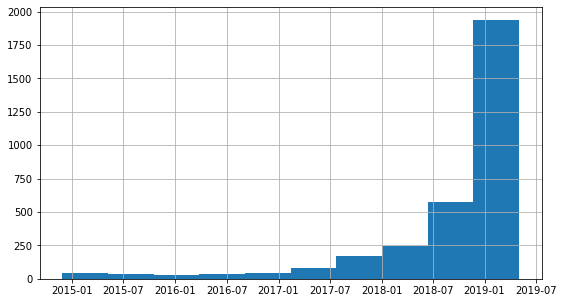

In [24]:
data.loc[data['days_exposition'].isna(), 'first_day_exposition'].hist(figsize=(9, 5))
plt.show()

Больше всего пропусков для объявлений выставленных в 2019 году: видимо, объявления к моменту исследования действительно еще не были сняты с сайта.

Пропуски в длительности экспозиции объявлений заполнять не будем - пропуски сами по себе уже говорят, что данных о том, как долго объявление было на сайте, нет (а их действительно нет, если объявления не сняты).

Логично предположить, что если не указан тип квартиры "апартаменты", значит, квартира ими не является. Аналогично с балконами - если значение пропущено, видимо, балконов в квартире нет (0 балконов).

In [25]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False #замена пропусков данных об апартаментах на False
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [26]:
print('Значения в столбце is_apartment:', data['is_apartment'].unique()) #проверка значений после замены
print('Значения в столбце balcony:', data['balcony'].unique()) #проверка значений после замены

Значения в столбце is_apartment: [False True]
Значения в столбце balcony: [0. 2. 1. 5. 4. 3.]


Определим, сколько пропусков есть в данных о населенном пункте. В целях выполнения проекта, необходимо выделить квартиры в Санкт-Петербурге. Заполнить пропуски locality_name не получится - нет данных, по которым можно было бы установить пропущенные населенные пункты. Поэтому строки с пропусками locality_name будут удалены, тем более, что их доля невелика - всего 0,2%.

In [27]:
print('Всего строк в датасете:', len(data))
print('Пропусков значений населенного пункта:', data['locality_name'].isna().sum())
data.dropna(subset=['locality_name'], inplace=True) #удаление строк с пропусками значения населенного пункта
print('Всего строк в датасете после удаления строк с пропусками населенных пунктов:', len(data))

Всего строк в датасете: 23699
Пропусков значений населенного пункта: 49
Всего строк в датасете после удаления строк с пропусками населенных пунктов: 23650


Проверим, какие данные записаны в столбцах количества комнат, квартиры-студии и свободной планировке - все они должны быть схожи в том, что в таких квартирах всего одна комната. Кроме того, вероятно, что пропуски living_area и kitchen_area будут встречаться именно при свободной планировке и в квартирах-студиях.

In [28]:
data[['rooms', 'living_area', 'kitchen_area', 'open_plan', 'studio']].query('studio == True').head() #студии

,rooms,living_area,kitchen_area,open_plan,studio
144,0,15.50,NaN,False,True
440,0,24.75,NaN,False,True
608,0,NaN,NaN,False,True
697,0,17.50,NaN,False,True
716,0,12.00,NaN,False,True


In [29]:
data[['rooms', 'living_area', 'kitchen_area', 'open_plan', 'studio']].query('open_plan == True').head() #открытая планировка

,rooms,living_area,kitchen_area,open_plan,studio
349,0,17.0,NaN,True,False
508,0,24.3,NaN,True,False
780,0,NaN,NaN,True,False
839,0,15.0,NaN,True,False
946,0,18.0,NaN,True,False


У студий и открытой планировки - 0 комнат. Это можно объяснить тем, что в таких квартирах нет внутренних стен - видимо, поэтому число комнат приравнено к нулю (нет внутренних стен - нет комнат).

Проверим, все ли квартиры с 0 комнат относятся к студиям или открытой планировке.

In [30]:
print('Квартиры со значением 0 комнат:', data.query('rooms == 0')['rooms'].count())
print('Квартиры со значением 0 комнат, которые являются студиями или имеют открытую планировку:', len(
    data.query('rooms == 0 and (studio == True or open_plan == True)'))
     )

Квартиры со значением 0 комнат: 197
Квартиры со значением 0 комнат, которые являются студиями или имеют открытую планировку: 197


Скорее всего, 0 в данном случае не является пропуском, это значение специально для открытой планировки или квартиры-студии. Поэтому оставим 0 комнат как есть.

Чтобы заполнить пропущенные значения высоты потолков, этажность дома, жилую площадь и площадь кухни, можно использовать медианные значения и другие расчеты по населенному пункту.

Для этого необходимо привести все населенные пункты к единым названиям.

In [31]:
len(data['locality_name'].unique()) #количество уникальных значений столбца locality_name

364

In [32]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #для начала заменим все ё на е

In [33]:
data['locality_name'].unique() #проверим, какие слова составляют обозначение населенных пунктов

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [34]:
localities = [
    'поселок ', 
    'село ', 
    'городского типа ', 
    'деревня ', 
    'коттеджный ', 
    'станции ', 
    'при железнодорожной ', 
    'городской ', 
    'садоводческое некоммерческое товарищество ',
    'садовое товарищество '
]

for l in localities:
    data['locality_name'] = data['locality_name'].str.replace(l, '')

In [35]:
len(data['locality_name'].unique()) #количество значений столбца после замен

305

В описании проекта отдельно отмечено, что данные расстояния до центра и аэропорта составлены автоматически на основе картографических данных. Значит, если значения расстояния до центра и аэропорта пропущены, автоматически они не определились - значение расстояния экстраординарное, очевидно, слишком большое. Оставим пропуски - они означают, что центр города или аэропорт неблизко.

Чтобы заполнить этажность домов, используем данные медианы по населенному пункту, при этом будем учитывать этаж, на котором находится продаваемая квартира - он не может быть больше этажности дома:

In [36]:
for locality in data['locality_name'].unique():
    floor_median = data.query('locality_name == @locality')['floors_total'].median() 
    #медиана этажности домов определена в зависимости от населенного пункта
    data.loc[data['floor'] > floor_median, 'floors_total'].fillna('floor', inplace=True) 
    #где этаж квартиры выше медианы, там определим этажность дома этим этажом
    data['floors_total'].fillna(floor_median, inplace=True) 
    #остальные пропуски заполняются медианой

In [37]:
data['floors_total'].isna().sum() #проверка наличия пропусков этажности дома

0

Чтобы заполнить пропуски ceiling_height, используем данные по этажности домов.

In [38]:
for f in data['floors_total'].unique():
    data.loc[(data['floors_total'] == f) & data['ceiling_height'].isna(), 'ceiling_height'] = data.loc[
        data['floors_total'] == f, 'ceiling_height'].median() #замена на медиану высоты потолков этажности домов

d:\programs\python38-32\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [39]:
len(data.query('ceiling_height.isna()')) #количество незаполненных значений, для которых не было среднего по населенному пункту

1

In [40]:
data.query('ceiling_height.isna()')[['floor', 'floors_total']] #этаж в доме, для которого нет данных по высоте потолков

,floor,floors_total
11575,32,33.0


In [41]:
data['floors_total'].unique() #проверим, какие дома наиболее близки по этажности

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [42]:
data['ceiling_height'].fillna(
    data.loc[data['floors_total'] == 34, 'ceiling_height'].median(), inplace=True
)#заполним пропуск медианой наиболее близкого по этажности дома

In [43]:
len(data.query('ceiling_height.isna()')) #количество незаполненных значений высоты потолка

0

Пропуски по жилой площади и площади кухни заполним в зависимости не от населенного пункта (норматив должен быть примерно одинаковым во всех населенных пунктах страны), а от количества комнат.

In [44]:
data[['rooms', 'living_area', 'kitchen_area']].corr()

,rooms,living_area,kitchen_area
rooms,1.000000,0.846088,0.270585
living_area,0.846088,1.000000,0.428773
kitchen_area,0.270585,0.428773,1.000000


Есть сильная положительная корреляция между количеством комнат и жилой площадью и средней силы между количеством комнат и площадью кухни. Данные можно использовать для заполнения пропусков.

In [45]:
rooms_number = data['rooms'].unique()

In [46]:
for n in rooms_number:
    data.loc[data['rooms'] == n, 'living_ratio'] = (
        data.query('rooms == @n')['living_area'] / data.query('rooms == @n')['total_area']
    ).median() #создадим столбец с коэффициентами соотношения жилой и общей площади для каждого количества комнат

In [47]:
for n in rooms_number:
    data.loc[data['rooms'] == n, 'kitchen_ratio'] = (
        data.query('rooms == @n')['kitchen_area'] / data.query('rooms == @n')['total_area']
    ).median() #создадим столбец с коэффициентами соотношения площади кухни и общей площади для каждого количества комнат

d:\programs\python38-32\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [48]:
data[['living_ratio', 'kitchen_ratio']].isna().mean() #определим долю пропусков в данных living_ratio и kitchen_ratio

living_ratio     0.00000
kitchen_ratio    0.00833
dtype: float64

In [49]:
data.query('kitchen_ratio.isna()').pivot_table(
    index='rooms', values=['total_area', 'living_area', 'kitchen_area', 'kitchen_ratio', 'studio', 'open_plan']
) #проверим, какие данные есть в строках, где оказались пропуски kitchen_ratio

,living_area,open_plan,studio,total_area
rooms,,,,
0,18.865246,0.299492,0.700508,29.279746


Везде, где не удалось посчитать kitchen_ratio, нет данных площади кухни и 0 комнат. По-видимому, планировка таких квартир (это либо студии, либо квартиры с открытой планировкой) не предполагает отдельно выделенной площади кухни. Заполним площадь кухни в таких квартирах как медиану для всех однокомнатных квартир.

In [50]:
data.loc[data['kitchen_ratio'].isna(), 'kitchen_area'] = data.query('rooms == 1')['kitchen_area'].median()

На основе столбцов с коэффициентами заполним пропуски living_area и kitchen_area:

In [51]:
data.loc[data['living_area'].isna(), 'living_area'] = (
    data.loc[data['living_area'].isna(), 'living_ratio'] * data.loc[data['living_area'].isna(), 'total_area']
)
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (
    data.loc[data['kitchen_area'].isna(), 'kitchen_ratio'] * data.loc[data['kitchen_area'].isna(), 'total_area']
)

Пропуски, где это было необходимо и возможно, заполнены.

In [52]:
data['ceiling_height'] = data['ceiling_height'] * 100 #установим высоту потолков в сантиметрах для точности дальнейших расчетов

In [53]:
data.isna().mean()[data.isna().mean() != 0] #определим долю пропусков

airports_nearest       0.233996
cityCenters_nearest    0.233023
parks_nearest          0.659027
ponds_nearest          0.615856
days_exposition        0.134461
kitchen_ratio          0.008330
dtype: float64

Преобразуем необходимые числовые данные в тип int:

In [54]:
data[[
    'last_price',
    'total_area',
    'ceiling_height',
    'floors_total',
    'living_area',
    'kitchen_area',
    'balcony',
    'parks_around3000',
    'ponds_around3000'
]] = data[[
    'last_price',
    'total_area',
    'ceiling_height',
    'floors_total',
    'living_area',
    'kitchen_area',
    'balcony',
    'parks_around3000',
    'ponds_around3000'
]].astype('int') #преобразование в тип int

In [55]:
data.info() #тип float остался только у данных с пропусками и коэффициентов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  int32         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  int32         
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  int32         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int32         
 13  balcony         

In [56]:
data.duplicated().sum() #проверка на наличие дубликатов

0

### Вывод

Пропуски в данных были заполнены на основании различных данных (дополняющие данные про расстояние до парков и прудов, медианы значений по населенному пункту и этажности, коэффициенты, рассчитанные на основании количества комнат). 

Возможные причины появления пропусков данных:
- данные по случайности не были внесены
- данные были намеренно сокрыты
- значение отсутствует, поэтому не было внесено
- технический сбой
- удаление уже внесенных данных

Необходимые для расчетов значения float приведены к типу int для улучшения скорости работы с данными и точности результатов, при этом высота потолков переведена в сантиметры. Дата приведена к типу datetime (так как дата должна быть в данных в предназначенном для неё формате).

Проведена проверка на наличие дубликатов, дубликаты в данных отсутвуют.

## Расчёты и добавление результатов в таблицу

Расчет и добавление в таблицу цены квадратного метра:

In [57]:
data['price_per_sqrm'] = (data['last_price'] / data['total_area']).astype('int')

Расчет и добавление в таблицу дня недели, месяца и года публикации объявления:

In [58]:
data['weekday'] = data['first_day_exposition'].dt.weekday #0-6 для дней недели понедельник-воскресенье
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #номер месяца
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #год

Добавление в таблицу данных об этаже:

In [59]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[(data['floor'] == data['floors_total']), 'floor_type'] = 'последний'
data['floor_type'] = data['floor_type'].fillna('другой')

In [60]:
data['floor_type'].isna().sum() #проверка наличия пропусков

0

Расчет и добавление в таблицу соотношений жилой площади и площади кухни к общей площади:

In [61]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [62]:
data[[
    'price_per_sqrm', 
    'weekday', 
    'month', 
    'year', 
    'floor', 
    'floors_total', 
    'floor_type',
    'living_area_ratio',
    'kitchen_area_ratio'
]].head(15) #проверяем добавленные данные

,price_per_sqrm,weekday,month,year,floor,floors_total,floor_type,living_area_ratio,kitchen_area_ratio
0,120370,3,3,2019,8,16,другой,0.472222,0.231481
1,83750,1,12,2018,1,11,первый,0.450000,0.275000
2,92785,3,8,2015,4,5,другой,0.607143,0.142857
3,408176,4,7,2015,9,14,другой,0.628931,0.125786
4,100000,1,6,2018,13,14,другой,0.320000,0.410000
5,96333,0,9,2018,5,12,другой,0.466667,0.300000
6,100000,3,11,2017,6,26,другой,0.270270,0.378378
7,111478,3,4,2019,22,24,другой,0.577465,0.253521
8,87878,2,5,2018,26,27,другой,0.454545,0.242424
9,88524,6,2,2017,7,9,другой,0.704918,0.098361


### Вывод

В таблицу добавлены цена за квадратный метр в формате int, данные о дне недели, месяце и годе публикации объявления, данные об этаже в строковом формате и соотношения жилой площади и площади кухни к общей площади. В квартирах-студиях и в квартирах со свободной планировкой, где конкретная площадь кухни не предполагается, значения соотношения площади кухни к общей площади пропускаются.

## Исследовательский анализ данных

In [63]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']] #изучим требуемые данные

,total_area,last_price,rooms,ceiling_height
0,108,13000000,3,270
1,40,3350000,1,275
2,56,5196000,2,254
3,159,64900000,3,260
4,100,10000000,2,303
...,...,...,...,...
23694,133,9700000,3,370
23695,59,3100000,3,254
23696,56,2500000,2,280
23697,76,11475000,2,300


In [64]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.100930,6.541127e+06,2.070106,273.326216
std,35.673519,1.089640e+07,1.078620,99.562157
min,12.000000,1.219000e+04,0.000000,100.000000
25%,40.000000,3.400000e+06,1.000000,254.000000
50%,52.000000,4.650000e+06,2.000000,265.000000
75%,69.000000,6.799000e+06,3.000000,275.000000
max,900.000000,7.630000e+08,19.000000,10000.000000


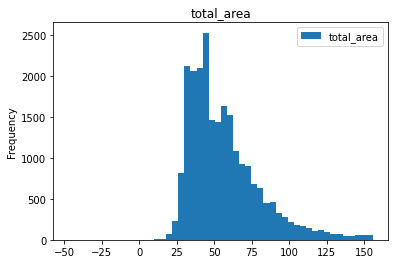

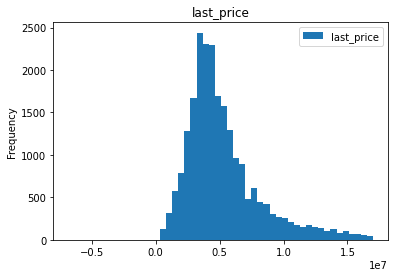

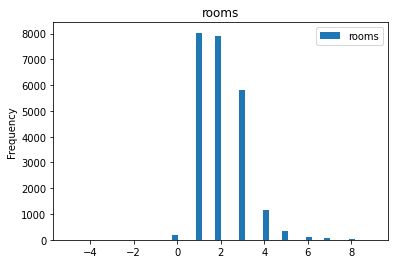

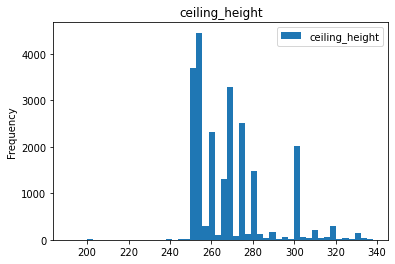

In [65]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in columns_list: #построим гистограммы для каждого из данных столбцов
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    data.plot(y=col, title=col, kind='hist', bins=50, range=(q1 - 3*(q3 - q1), q3 + 3*(q3 - q1)))

На нормальное распределение похожи только гистограммы общей площади квартиры и стоимости. Данные требуют дальнейшей обработки.

Изучим данные длительности продажи:

In [66]:
data['days_exposition'].describe() #срез без учета все еще не снятых объявлений

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

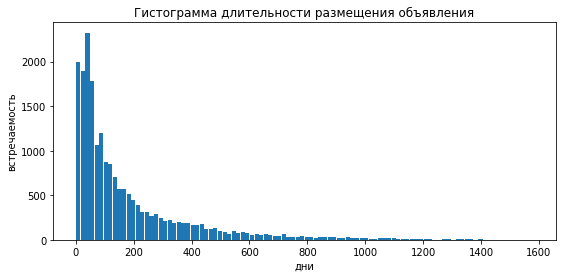

In [67]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'], bins = 100, rwidth = 0.9)
ax.set_title('Гистограмма длительности размещения объявления')
ax.set_xlabel('дни')
ax.set_ylabel('встречаемость')
fig.set_figwidth(9)

plt.show()

Рассмотрим подробнее данные о "быстрых" продажах на гистограмме.

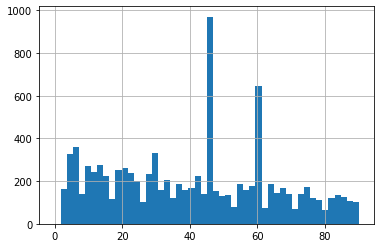

In [68]:
data['days_exposition'].hist(range=(0, 90), bins=50) #ограничим тремя месяцами
plt.show()

Примерно 45 и 60 дней имеют пики в частоте встречаемости длительности продаж. Значения выбиваются на фоне других данных. Возможно, через полтора и два месяца происходит какое-то автоматическое снятие объявления с сайта.

In [69]:
print('Среднее время продажи квартиры:', data['days_exposition'].mean())
print('Медиана времени продажи квартиры:', data['days_exposition'].median())

Среднее время продажи квартиры: 180.7531998045921
Медиана времени продажи квартиры: 95.0


Гистограмма похожа на распределение Пуассона.

Хотя среднее арифметическое времени продажи квартиры составляет около 180 дней, обычно продажа занимает меньше времени - медиана составляет 95 дней. Это означает, что у данных длинный "хвост" в сторону большого количества дней, что и демонстрирует гистограмма.

Чтобы определить слишком быстрые и слишком длительные продажи, используем интерквартильный размах.

In [70]:
iqr_exposition = 231 - 45 #Q1 и Q3 определены ранее при использовании метода describe
normal_exposition_lower = 45 - 1.5 * iqr_exposition
normal_exposition_higher = 231 + 1.5 * iqr_exposition

In [71]:
print('Нижняя граница в соответствии с расчетом:', normal_exposition_lower)
print('Верхняя граница в соответствии с расчетом:', normal_exposition_higher)

Нижняя граница в соответствии с расчетом: -234.0
Верхняя граница в соответствии с расчетом: 510.0


Так как нижняя граница получилась отрицательной, нижняя граница нормального времени продаж приравнивается к нулю.

Верхняя граница нормальной длительности продаж приравнивается к 510.

Таким образом, слишком быстрых продаж в соответствии с данными проверки 1.5 интерквартильным размахом нет, даже 1 день - нормальная длительность. Необычно долгими можно считать продажи свыше 510 дней.

В соответствии с заданием, уберем редкие и выбивающиеся значения. Для этого сначала обнаружим их с помощью диаграмм размаха.

Данные, не касающиеся цены квартиры и которые могут выбиваться - это любые числовые данные. Часть из них проще оценить с помощью describe, другую часть - визуально.

С помощью describe легко найти аномалии, касающиеся минимальных и максимальных значений данных, которые противоречат здравому смыслу (например, если в значениях количества комнат будет 60).

In [72]:
data[[
    'ceiling_height', 
    'total_images', 
    'floors_total', 
    'floor', 
    'balcony', 
    'parks_around3000', 
    'ponds_around3000',
    'rooms',
    'total_area']].describe()

,ceiling_height,total_images,floors_total,floor,balcony,parks_around3000,ponds_around3000,rooms,total_area
count,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,273.326216,9.862326,10.669852,5.893277,0.591712,0.469091,0.590359,2.070106,60.100930
std,99.562157,5.682278,6.583725,4.883317,0.959662,0.748458,0.883539,1.078620,35.673519
min,100.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,254.000000,6.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000
50%,265.000000,9.000000,9.000000,4.000000,0.000000,0.000000,0.000000,2.000000,52.000000
75%,275.000000,14.000000,16.000000,8.000000,1.000000,1.000000,1.000000,3.000000,69.000000
max,10000.000000,50.000000,60.000000,33.000000,5.000000,3.000000,3.000000,19.000000,900.000000


Очевидно выбивается из картины "здравого смысла" высота потолков - минимально 1 метр, максимально - 100 метров.

Согласно строительным нормам и правилам, высота потолка не должна быть меньше 2.5м - примем эту цифру как минимальное значения. Как максимальное значение примем высоту потолка 5м - более реалистичное значение, чем 100 м, которое возможно встретить в старых домах.

In [73]:
data = data.query('250 <= ceiling_height <= 500')

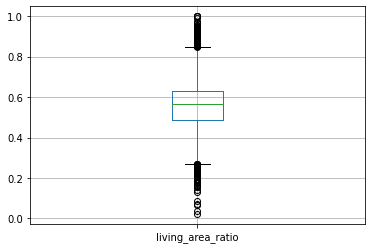

In [74]:
data.boxplot('living_area_ratio') #оценим необычные значения отношения жилой площади к общей площади
plt.show()

Удалим также и данные с выбросами в значениях отношения жилой площади к общей площади - есть слишком малые и слишком большие отношения, такие данные некачественные и сигнализируют о неверных значениях не только в отношении жилой площади, но и площади кухни (например, если отношение жилой площади к общей равно единице, то для кухни места не остается).

In [75]:
data['living_area_ratio'].describe() #получим точные значения

count    23540.000000
mean         0.561964
std          0.103722
min          0.021583
25%          0.486486
50%          0.568182
75%          0.631579
max          1.000000
Name: living_area_ratio, dtype: float64

In [76]:
iqr1_5l = 1.5 * (0.631579 - 0.486486)
lower_iqr_l = 0.486486 - iqr1_5l
higher_iqr_l = 0.631579 + iqr1_5l

In [77]:
data = data.query('@lower_iqr_l <= living_area_ratio <= @higher_iqr_l') #удалим значения с выбросами

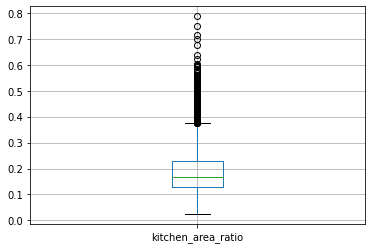

In [78]:
data.boxplot('kitchen_area_ratio') #оценим отношения площади кухни к общей площади при помощи диаграммы размаха
plt.show()

Найдем точное значение для отсечения выбросов. Для этого необходимо будет определить только верхнюю границу - на нижней выбросов нет.

In [79]:
data['kitchen_area_ratio'].describe()

count    23359.000000
mean         0.183294
std          0.071146
min          0.024259
25%          0.130435
50%          0.166667
75%          0.228571
max          0.787879
Name: kitchen_area_ratio, dtype: float64

In [80]:
iqr1_5k = 1.5 * (0.228571 - 0.130435)
iqr_k = 0.228571 + iqr1_5k

In [81]:
data = data.query('kitchen_area_ratio <= @iqr_k') #удалим значения с выбросами

Оценим данные цены на квадратный метр. Это будет проще сделать с помощью гистограммы, где отображается частота встречаемости значения.

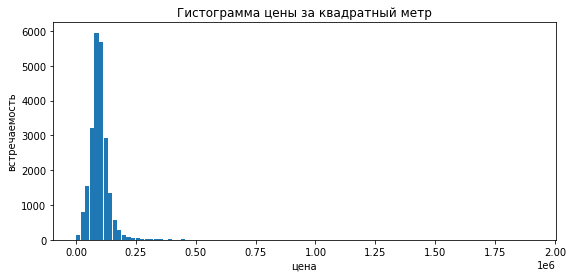

In [82]:
fig, ax = plt.subplots()

ax.hist(data['price_per_sqrm'], bins = 100, rwidth = 0.9)
ax.set_title('Гистограмма цены за квадратный метр')
ax.set_xlabel('цена')
ax.set_ylabel('встречаемость')
fig.set_figwidth(9)

plt.show()

Распределение похоже на нормальное.

In [83]:
data['price_per_sqrm'].describe()

count    2.300000e+04
mean     9.915967e+04
std      4.903257e+04
min      1.110000e+02
25%      7.674400e+04
50%      9.516100e+04
75%      1.142850e+05
max      1.907500e+06
Name: price_per_sqrm, dtype: float64

In [84]:
iqr1_5p = 1.5 * (114285 - 76744)
lower_iqr_p = 76744 - iqr1_5p
higher_iqr_p = 114285 + iqr1_5p

In [85]:
data = data.query('@lower_iqr_p <= price_per_sqrm <= @higher_iqr_p')

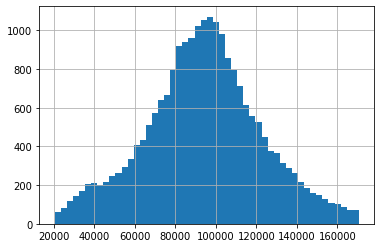

In [86]:
data['price_per_sqrm'].hist(bins=50)
plt.show()

Удалили выбивающиеся данные, имеющие выбивающиеся значения цены за квадратный метр, чтобы улучшить качество данных.

Оценим значения расстояний до аэропорта, центра города, парков и водоемов на наличие неправдоподобных максимальных и минимальных значений.

In [87]:
data.query('parks_nearest != -1000000 and ponds_nearest != -1000000 and airports_nearest != -1000000')[[
    'cityCenters_nearest', 
    'airports_nearest', 
    'parks_nearest', 
    'ponds_nearest'
]].describe()

,cityCenters_nearest,airports_nearest,parks_nearest,ponds_nearest
count,16806.000000,16793.000000,7224.000000,8200.000000
mean,14640.705700,28906.903293,488.744048,527.261585
std,8590.484937,12838.345215,331.549217,277.469919
min,215.000000,6450.000000,1.000000,13.000000
25%,10085.000000,18396.000000,289.000000,307.000000
50%,13364.000000,26885.000000,455.000000,515.000000
75%,16527.000000,37480.000000,612.000000,738.250000
max,65968.000000,84869.000000,3190.000000,1344.000000


Значения выглядят правдоподобно.

При проверке на наличие необычных и выбивающихся значений были отсеяны неправдоподбные данные, в которых встречались такие значения как, например, 1 м высота потолка или жилая площадь, занимающая всю квартиру. Часть данных была оценена с помощью метода describe, который позволяет оценить типичные, а также минимальные и максимальные значения. Другие значимые данные были оценены с помощью диаграмм размаха, показывающих выбросы.

Оценим зависимость цены квартиры от площади, числа комнат, удалённости от центра.

In [88]:
stat_multi = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'price_per_sqrm']]
display(stat_multi.corr())

,last_price,total_area,rooms,cityCenters_nearest,price_per_sqrm
last_price,1.000000,0.859197,0.591747,-0.317426,0.524559
total_area,0.859197,1.000000,0.785360,-0.205760,0.084855
rooms,0.591747,0.785360,1.000000,-0.170473,-0.094697
cityCenters_nearest,-0.317426,-0.205760,-0.170473,1.000000,-0.391231
price_per_sqrm,0.524559,0.084855,-0.094697,-0.391231,1.000000


Стоимость квартиры имеет сильную корреляционную связь с общей площадью квартиры, средней силы и положительная - с количеством комнат, отрицательная - с удаленностью от центра. Присутствует корреляционная связь средней силы с ценой за квадратный метр.

Цена за квадратный метр имеет отрицательную корреляционную связь средней силы с удаленностью от центра.

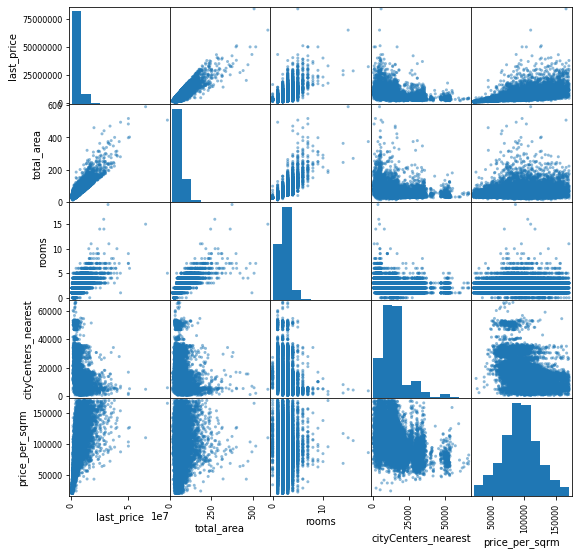

In [89]:
pd.plotting.scatter_matrix(stat_multi, figsize=(9, 9))
plt.show()

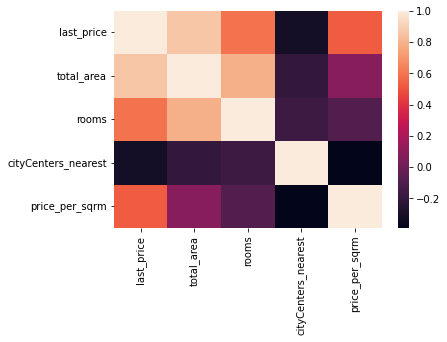

In [90]:
sns.heatmap(stat_multi.corr())
plt.show()

Оценим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, а также от даты размещения: дня недели, месяца и года.

In [91]:
def sort_types(f):
    if f == 'первый':
        return 1
    elif f == 'другой':
        return 2
    else:
        return 3

data['floor_type_int'] = data['floor_type'].apply(sort_types) #присвоим числовые значения для типа этажа

In [92]:
stat_multi2 = data[['last_price', 'floor_type_int', 'weekday', 'month', 'year', 'price_per_sqrm']]
display(stat_multi2.corr())

,last_price,floor_type_int,weekday,month,year,price_per_sqrm
last_price,1.000000,0.057698,-0.012030,0.011316,-0.040162,0.524559
floor_type_int,0.057698,1.000000,0.005512,0.006445,0.011526,0.040315
weekday,-0.012030,0.005512,1.000000,0.010980,-0.002092,-0.011655
month,0.011316,0.006445,0.010980,1.000000,-0.269833,0.003671
year,-0.040162,0.011526,-0.002092,-0.269833,1.000000,0.061122
price_per_sqrm,0.524559,0.040315,-0.011655,0.003671,0.061122,1.000000


Общая стоимость квартиры и цена за квадратный метр практически не коррелируют с этажом, днем, месяцем и годом размещения объявления.

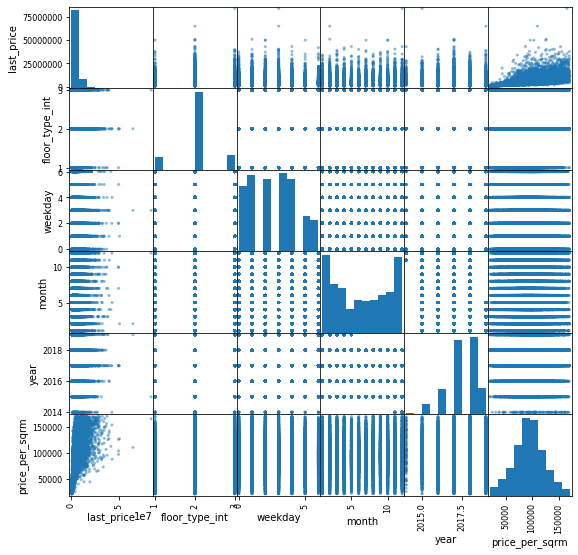

In [93]:
pd.plotting.scatter_matrix(stat_multi2, figsize=(9, 9))
plt.show()

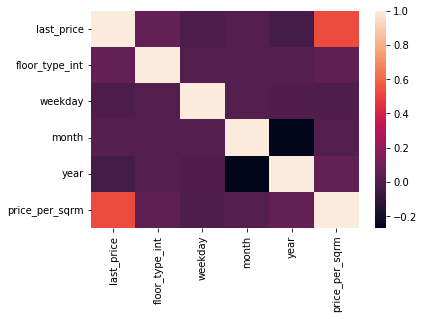

In [94]:
sns.heatmap(stat_multi2.corr())
plt.show()

Интересно, что больше всего объявлений размещается в конце и начале года, меньше их размещают в выходные и число объявлений растет с каждым годом (последний год, по-видимому, на момент исследования ещё не закончился, поэтому встречается нечасто).

Также оценим влияние на цену квартиры парков и водоемов в округе, удаленности от аэропорта.

In [95]:
stat_multi3 = data.query('airports_nearest != -1000000')[[
    'last_price', 'parks_around3000', 'ponds_around3000', 'airports_nearest', 'price_per_sqrm']]
display(stat_multi3.corr())

,last_price,parks_around3000,ponds_around3000,airports_nearest,price_per_sqrm
last_price,1.000000,0.258885,0.259529,-0.034585,0.524559
parks_around3000,0.258885,1.000000,0.380456,0.010186,0.264672
ponds_around3000,0.259529,0.380456,1.000000,-0.051430,0.276743
airports_nearest,-0.034585,0.010186,-0.051430,1.000000,-0.032469
price_per_sqrm,0.524559,0.264672,0.276743,-0.032469,1.000000


Парки и водоемы в округе имеют слабую положительную корреляционную связь с ценой на квартиру. С удаленностью от аэропорта связи практически нет.

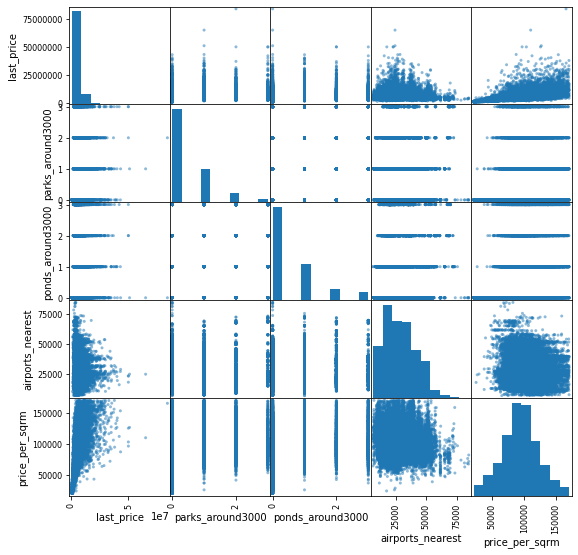

In [96]:
pd.plotting.scatter_matrix(stat_multi3, figsize=(9, 9))
plt.show()

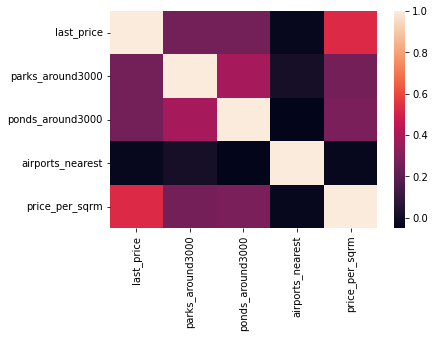

In [97]:
sns.heatmap(stat_multi3.corr())
plt.show()

Найдем населенные пункты с наибольшим количеством объявлений:

In [98]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    14445
Мурино               553
Кудрово              442
Шушары               430
Всеволожск           387
Пушкин               352
Колпино              335
Парголово            310
Гатчина              298
Выборг               230
Name: locality_name, dtype: int64

Средняя цена квадратного метра для данных населенных пунктов:

In [99]:
localities_index = data['locality_name'].value_counts().head(10).index.to_list()
locality_price = data.query('locality_name in @localities_index').pivot_table(index='locality_name', values='price_per_sqrm')
locality_price

,price_per_sqrm
locality_name,
Всеволожск,67414.348837
Выборг,58601.182609
Гатчина,69530.104027
Колпино,75859.286567
Кудрово,95807.904977
Мурино,86169.285714
Парголово,90056.083871
Пушкин,102493.931818
Санкт-Петербург,106465.460228


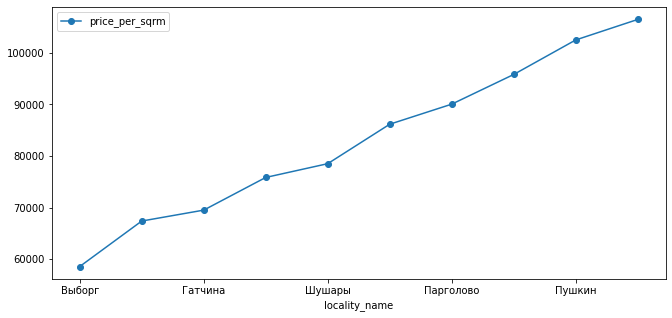

In [100]:
locality_price.sort_values(by='price_per_sqrm').plot(style='o-', figsize=(11, 5))
plt.show()

Дороже всего квартиры в Санкт-Петербурге, на втором месте Пушкин, за ним - Парголово. Дешевле всего из десятки стоят квартиры в Выборге.

Необходимо выяснить, какая область Санкт-Петербурга входит в центр города. Создадим столбец для Санкт-Петербурга с округленными до целых данными расстояния до центра в километрах: 

In [101]:
data['spb_center_km'] = (data.loc[
    (data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'] != -1000000)
]['cityCenters_nearest'] / 1000).round()

In [102]:
center = data.pivot_table(index='spb_center_km', values='price_per_sqrm') #посчитаем среднюю цену для каждого километра
center.head(20)

,price_per_sqrm
spb_center_km,
0.0,110844.923077
1.0,117342.496296
2.0,111080.500000
3.0,109081.830065
4.0,114363.293286
5.0,117635.990371
6.0,119399.598712
7.0,117699.041935
8.0,117759.734226


Для наглядности построим график:

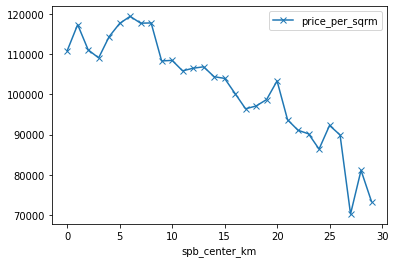

In [103]:
center.plot(style='x-')
plt.show()

На 9 км цена падает и больше не достигает уровня цены восьмого километра. Центральная зона Санкт-Петербурга - около 8 км.

Изучим центр города отдельно.


In [104]:
data_center = data.query('0 <= spb_center_km <= 8')

In [105]:
data_center[['total_area', 'last_price', 'price_per_sqrm', 'rooms', 'ceiling_height']]

,total_area,last_price,price_per_sqrm,rooms,ceiling_height
24,97,6500000,67010,2,280
35,149,15500000,104026,5,254
52,136,11795000,86727,6,300
61,74,7990000,107972,2,300
63,118,20000000,169491,3,300
...,...,...,...,...,...
23665,47,4250000,90425,1,300
23681,43,5250000,122093,2,250
23690,52,5500000,105769,2,254
23691,72,9470000,131527,2,275


In [106]:
print('ВЕСЬ ГОРОД')
data.query('locality_name == "Санкт-Петербург"')[[
    'total_area', 'last_price', 'price_per_sqrm', 'rooms', 'ceiling_height'
]].describe() #данные по всему городу

ВЕСЬ ГОРОД


,total_area,last_price,price_per_sqrm,rooms,ceiling_height
count,14445.000000,1.444500e+04,14445.000000,14445.000000,14445.000000
mean,61.596054,6.560613e+06,106465.460228,2.148217,271.532503
std,33.995846,4.061065e+06,22198.766742,1.121208,23.611010
min,13.000000,1.190000e+06,24489.000000,0.000000,250.000000
25%,41.000000,4.150000e+06,90322.000000,1.000000,254.000000
50%,54.000000,5.300000e+06,103125.000000,2.000000,265.000000
75%,72.000000,7.500000e+06,120227.000000,3.000000,275.000000
max,590.000000,8.400000e+07,170588.000000,19.000000,470.000000


In [107]:
print('ЦЕНТР ГОРОДА')
data_center[[ 'total_area', 'last_price', 'price_per_sqrm', 'rooms', 'ceiling_height']].describe() #данные по центру

ЦЕНТР ГОРОДА


,total_area,last_price,price_per_sqrm,rooms,ceiling_height
count,3276.000000,3.276000e+03,3276.000000,3276.000000,3276.000000
mean,84.226496,9.600839e+06,116048.846764,2.772283,293.039988
std,47.907952,5.690819e+06,25277.669302,1.412282,33.549943
min,13.000000,1.686000e+06,26250.000000,0.000000,250.000000
25%,54.000000,6.050000e+06,96114.750000,2.000000,270.000000
50%,73.000000,8.200000e+06,114000.000000,3.000000,295.000000
75%,100.000000,1.145564e+07,135456.750000,3.000000,310.000000
max,590.000000,8.400000e+07,170588.000000,19.000000,450.000000


В центре города общая площадь квартир больше, цена как в целом так и за квадратный метр выше, среднее количество комнат больше, даже потолки в среднем выше на 30 см.

In [108]:
print('ВЕСЬ ГОРОД')
data.query('locality_name == "Санкт-Петербург"')[[
    'last_price', 
    'price_per_sqrm', 
    'rooms',
    'floor',
    'floor_type_int', 
    'cityCenters_nearest',
    'first_day_exposition']].corr()

ВЕСЬ ГОРОД


,last_price,price_per_sqrm,rooms,floor,floor_type_int,cityCenters_nearest
last_price,1.000000,0.385727,0.633481,0.016427,0.082709,-0.376086
price_per_sqrm,0.385727,1.000000,-0.204384,0.179996,0.078615,-0.271182
rooms,0.633481,-0.204384,1.000000,-0.171003,0.023037,-0.286987
floor,0.016427,0.179996,-0.171003,1.000000,0.334877,0.222918
floor_type_int,0.082709,0.078615,0.023037,0.334877,1.000000,-0.045588
cityCenters_nearest,-0.376086,-0.271182,-0.286987,0.222918,-0.045588,1.000000


In [109]:
stat_center = data_center[[
    'last_price', 
    'price_per_sqrm', 
    'rooms',
    'floor',
    'floor_type_int', 
    'cityCenters_nearest',
    'first_day_exposition']]
print('ЦЕНТР ГОРОДА')
stat_center.corr()

ЦЕНТР ГОРОДА


,last_price,price_per_sqrm,rooms,floor,floor_type_int,cityCenters_nearest
last_price,1.000000,0.265986,0.627758,0.133572,0.111702,-0.133438
price_per_sqrm,0.265986,1.000000,-0.291274,0.277531,0.033612,0.092416
rooms,0.627758,-0.291274,1.000000,-0.098796,0.087546,-0.248038
floor,0.133572,0.277531,-0.098796,1.000000,0.351914,0.283241
floor_type_int,0.111702,0.033612,0.087546,0.351914,1.000000,-0.045736
cityCenters_nearest,-0.133438,0.092416,-0.248038,0.283241,-0.045736,1.000000


В отличие от всего города, в центре сильнее положительная корреляция цены с высотой этажа и слабее отрицательная корреляция с центром города. Слабее положительная корреляция цены с числом комнат.

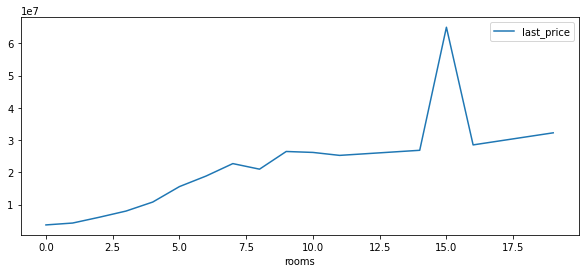

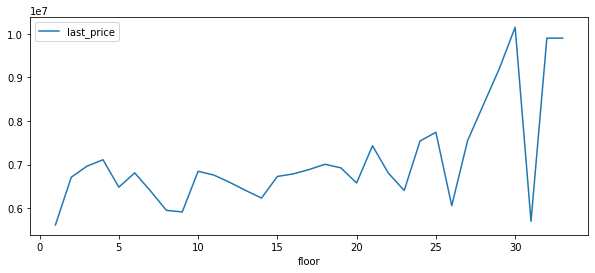

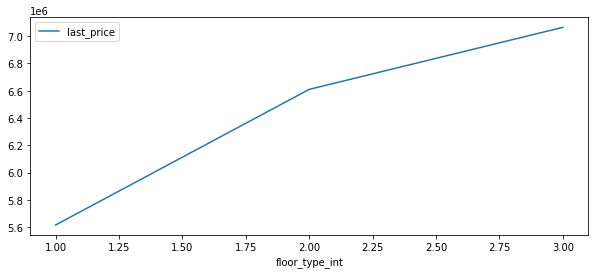

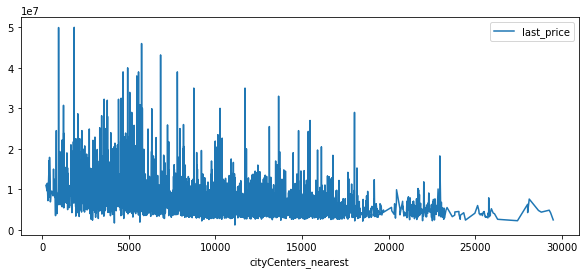

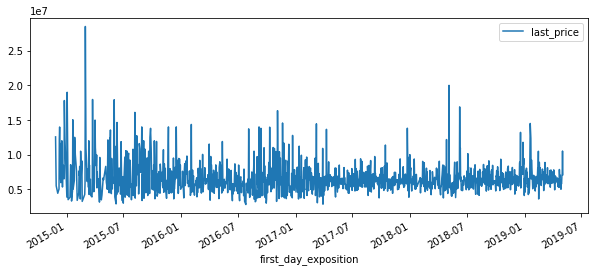

In [110]:
for i in ['rooms', 'floor', 'floor_type_int', 'cityCenters_nearest', 'first_day_exposition']: #построим графики
    data.query('locality_name == "Санкт-Петербург"').pivot_table(index=i, values='last_price').plot(figsize=(10, 4))

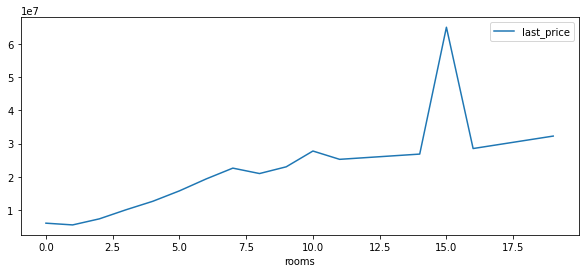

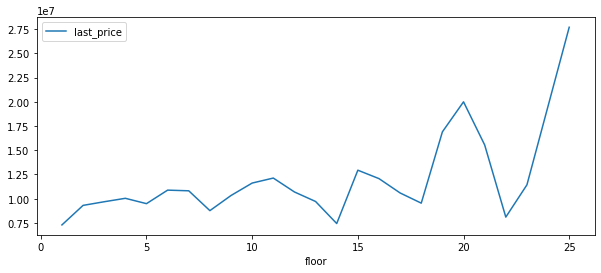

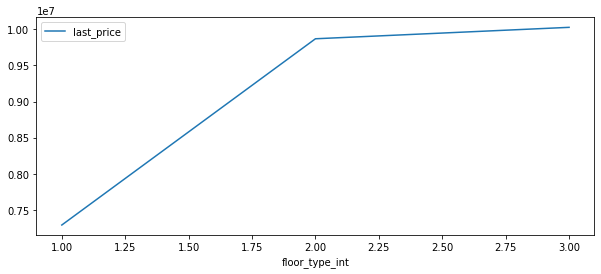

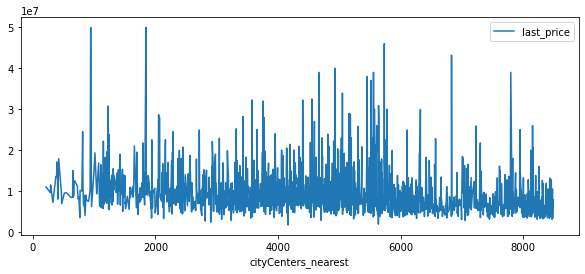

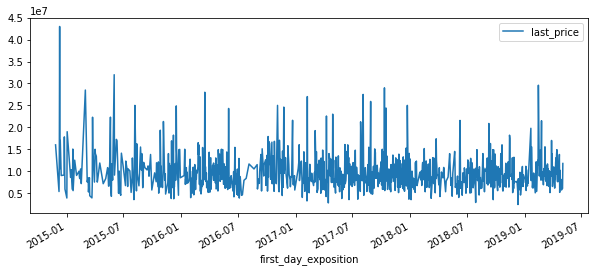

In [111]:
for i in ['rooms', 'floor', 'floor_type_int', 'cityCenters_nearest', 'first_day_exposition']: #построим графики
    stat_center.pivot_table(index=i, values='last_price').plot(figsize=(10, 4))

График зависимости цены от количества комнат демонстрирует, что квартиры с 15 комнатами как в центре, так и по всему городу стоят дороже.

Такая же ситуация с последним этажом - это самый дорогой этаж в городе.

Во всем городе в целом цена квартиры не имеет такого тренда к снижению по мере удаленности от центра, как это присутствует в центре города.

Кроме того, в центре города присутствуют сезонные "пики" зависимости цены от даты размещения - более дорогие квартиры в центре города размещали в конце года и в начале лета.

Внесем в таблицу информацию о том, в центре города находится объект продажи или нет, для этого добавим столбец `is_center`, где 1 - квартире находится в центре, 0 - квартира находится за пределами центра города:

In [112]:
data.loc[data['spb_center_km'] <= 8, 'is_center'] = 1
data.loc[data['spb_center_km'] > 8, 'is_center'] = 0

Визуализируем параметры для центра и для остальной части города на одном рисунке. Так различия стоимости наглядно видны: 

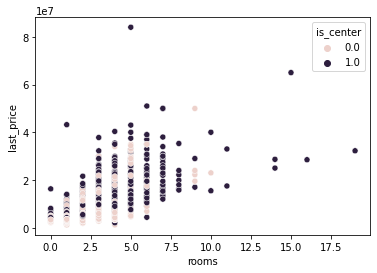

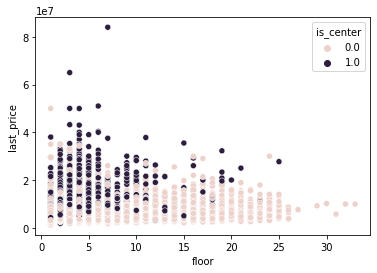

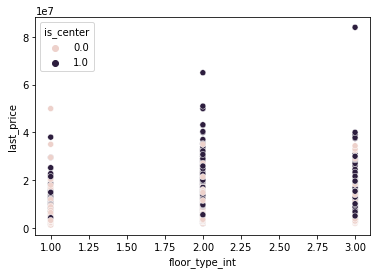

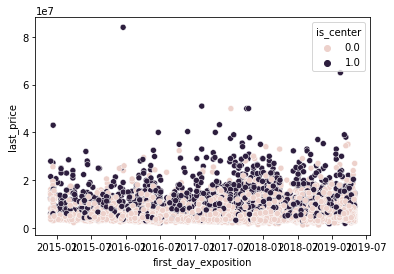

In [113]:
for i in ['rooms', 'floor', 'floor_type_int', 'first_day_exposition']: #построим графики
    sns.scatterplot(data=data, x=i, y='last_price', hue='is_center').plot(figsize=(10, 4))
    plt.show()

На графиках `scatterplot` для различных параметров квартир продемонстрировано, что стоимость квартир в центре в целом превышает стоимость квартир, которые в центре не расположены.

### Вывод

Установлено наличие ряда связей различных факторов с ценой квартиры. При этом был выделен "центр" города, который имеет отличия в характеристиках квартир и факторах, связанных с ценой, от всего города в целом.

## Общий вывод

В ходе проекта были изучены изучены данные объявлений о продаже квартир в Санкт-Петербурге и ближайших городах.

Пропущенные значения в данных высоты потолков, отношения жилой площади или площади кухни к общей, этажности (данные, необходимые для решения задачи) были определены в зависимости от населенного пункта или других взаимосвязанных данных - это 
позволило сохранить большой пласт данных.

Определен центральный район города - это область 8 км от точки, обозначенной как центр Санкт-Петербурга. На 9 км цена падает и больше не достигает уровня цены восьмого километра.

Санкт-Петербург ожидаемо оказался городом с самыми дорогими квартирами из всех представленных.

В центре Санкт-Петербурга общая площадь квартир больше примерно на 20 кв.м, цена квартир выше почти на 50% так, а за квадратный метр выше больше чем на 10 000 руб., среднее количество комнат больше на одну, потолки в среднем выше на 30 см.

В отличие от всего города, в центральном районе Санкт-Петербурга сильнее положительная корреляция стоимости квартиры с высотой этажа и слабее отрицательная корреляция стоимости с удаленностью от центра, слабее корреляция цены с числом комнат. Также выяснилось, что в центральном районе города присутствуют сезонные "пики" зависимости цены от даты размещения - более дорогие квартиры, продающиеся в центре города, размещали в конце года и в начале лета.

Во всем городе дороже всего стоят квартиры с 15 комнатами (даже несмотря на то, что есть квартиры с большим числом комнат). Последний этаж - самый дорогой.

Отсутствие в объявлении выявленных закономерностей будет говорить о вероятных мошеннических действиях разместившего его субъекта.